In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
df_sp500 = pdr.get_data_yahoo('^GSPC', '2010-01-01')

In [4]:
stock_list = pd.read_excel('StockPrices.xlsx').columns.tolist()
stock_list.pop(0)
print(stock_list)

['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABMD', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATO', 'ATVI', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BHGE', 'BIIB', 'BK', 'BKNG', 'BLK', 'BLL', 'BMY', 'BR', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBRE', 'CBS', 'CCI', 'CCL', 'CDNS', 'CE', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CPRI', 'CPRT', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTVA', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA',

In [5]:
# Calculate returns using closing price
df_sp500['Returns'] = np.log(df_sp500['Close'] / df_sp500['Close'].shift(1))

In [6]:
# Calculate Volatility using rolling standard deviation function
df_sp500['Volatility'] = df_sp500['Returns'].rolling(window=252).std() * np.sqrt(252)

In [7]:
df_sp500.tail()

High          Low         Open        Close      Volume  \
Date                                                                         
2020-10-02  3369.100098  3323.689941  3338.939941  3348.419922  3961550000   
2020-10-05  3409.570068  3367.270020  3367.270020  3408.600098  3686920000   
2020-10-06  3431.560059  3354.540039  3408.739990  3360.969971  4443380000   
2020-10-07  3426.260010  3384.560059  3384.560059  3419.439941  3807830000   
2020-10-08  3443.169922  3432.840088  3434.280029  3442.389893   479650886   

              Adj Close   Returns  Volatility  
Date                                           
2020-10-02  3348.419922 -0.009624    0.340372  
2020-10-05  3408.600098  0.017813    0.340540  
2020-10-06  3360.969971 -0.014072    0.340818  
2020-10-07  3419.439941  0.017247    0.340835  
2020-10-08  3442.389893  0.006689    0.340785

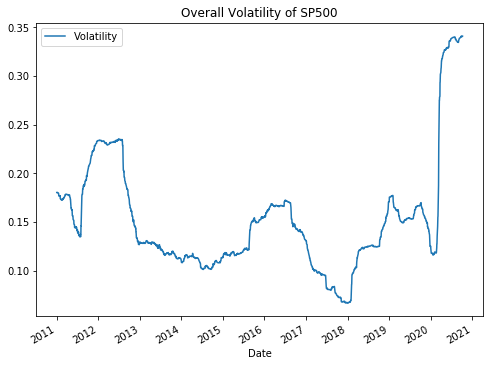

In [8]:
# Volatility of SP500
df_sp500[['Volatility']].plot(title="Overall Volatility of SP500", figsize=(8, 6))

In [9]:
df_sp500[['Volatility']].mean()

Volatility    0.152295
dtype: float64

In [48]:
max_vol = 0
min_vol = 1
max_co = ""
min_co = ""

# Will loop through first 10 in stock list
# change 10 to len(stock_list) to loop through all

for i in range (0, 10):
    
    try:
        df = pdr.get_data_yahoo(stock_list[i], '2020-01-01')
        
    except:
        continue
        
    df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
    df['Volatility'] = df['Returns'].rolling(window=21).std() * np.sqrt(21)
    avg_vol = df['Volatility'].mean()
    
    if (avg_vol < min_vol):
        min_vol = avg_vol
        min_co = stock_list[i]
    if (avg_vol > max_vol):
        max_vol = avg_vol
        max_co = stock_list[i]
        
print("Most Volatile: ", max_co)
print("Least Volatile: ", min_co)
 

Most Volatile:  AAL
Least Volatile:  ABBV


Text(0, 0.5, 'Volatility')

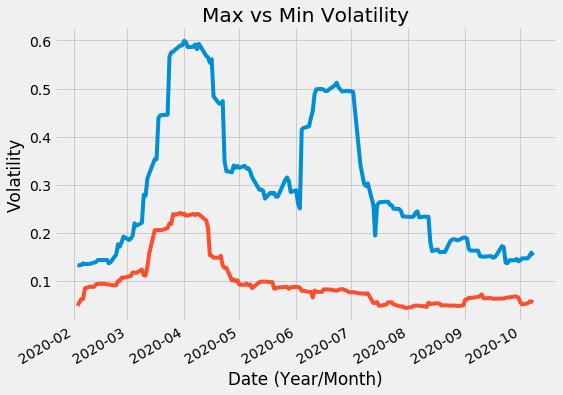

In [49]:
df_max = pdr.get_data_yahoo(max_co, '2020-01-01')
df_max['Returns'] = np.log(df_max['Close'] / df_max['Close'].shift(1))
df_max['Volatility'] = df_max['Returns'].rolling(window=21).std() * np.sqrt(21)

df_min = pdr.get_data_yahoo(min_co, '2020-01-01')
df_min['Returns'] = np.log(df_min['Close'] / df_min['Close'].shift(1))
df_min['Volatility'] = df_min['Returns'].rolling(window=21).std() * np.sqrt(21)

plot1 = df_max['Volatility']
plot2 = df_min['Volatility']

ax = plot1.plot(title="Max vs Min Volatility", figsize=(8, 6))
plot2.plot(ax=ax)

ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Volatility')